In [3]:
import pandas as pd

In [2]:

data = pd.DataFrame({"2000Y"  : [12,10,16,19],
                     "2020Y": [14,12,17,23]})
data.head()

,2000Y,2020Y
0,12,14
1,10,12
2,16,17
3,19,23


In [67]:
import matplotlib.pyplot as plt
def graph_type(ax,g_type,value,**kwargs):
    """graphの出力タイプ
    """
    if g_type == "line":
            ax.plot(value,label=kwargs["label"],color=kwargs["color"],linewidth=3,marker="o")
    elif g_type =="hist":
        cnt_bins=len(value)
        ax.hist(value,bins=cnt_bins,label=kwargs["label"],color=kwargs["color"])
    elif g_type =="box":
            ax.boxplot(value,label=kwargs["label"],color=kwargs["color"])
    elif g_type =="bar":
        x=kwargs["x"]
        ax.bar(x,value,label=kwargs["label"],color=kwargs["color"])
    else:
        pass

In [68]:
class graph:
    def __init__(self):
        pass
    def duplex(self,**kwargs):
        # グラフの事象設定
        plt.figure(1,figsize=(10,5))

        # グラフの象限の設定
        row,col,pos=1,1,1
        ax=plt.subplot(1, 1, 1)

        # グラフの重複数設定
        duple=len(kwargs["g_type"])

        # グラフのデータ設定
        main_title=kwargs.get("main_title")
        x_title=kwargs.get("x_title")
        x_scale=kwargs.get("x_scale")
        if x_scale is None:
            pass
        else:
            x_scale,x_scale_label=x_scale
        x_rotation=kwargs.get("x_rotation",90)
        y_title=kwargs.get("y_title")
        y_scale=kwargs.get("y_scale")
        if y_scale is None:
            pass
        else:
            y_scale,y_scale_label=y_scale
        y_rotation=kwargs.get("y_rotation",90)
        g_type=kwargs["g_type"]
        g_data=kwargs["g_data"]
        label=kwargs.get("label")
        color=kwargs.get("color")
        
        i=0
        for i in range(duple):
            value = g_data[i]
            graph_type(ax,g_type[i],value,label=label[i],x=x_scale,color=color[i])
            i +=1
            
        # 軸の目盛りラベル
        if x_scale is None:
            pass
        else:
            plt.xticks(x_scale,x_scale_label,rotation=x_rotation)
        if y_scale is None:
            pass
        else:
            plt.yticks(y_scale,y_scale_label)
        
        # グラフの凡例
        plt.legend()

        # グラフのタイトル /ラベル
        plt.title(main_title)
        plt.xlabel(x_title)
        plt.ylabel(y_title)

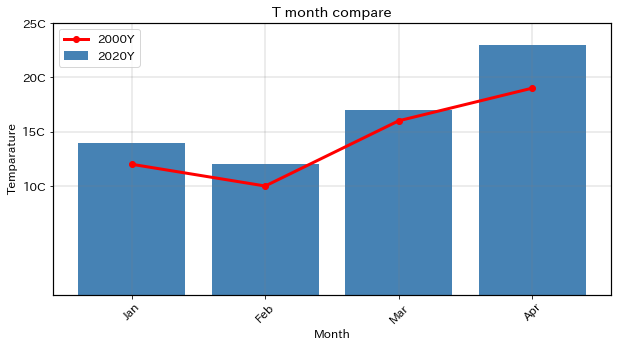

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
g=graph()
g.duplex(main_title="T month compare",
         x_title="Month",
         x_rotation=45,
         x_scale=[[0,1,2,3],["Jan","Feb","Mar","Apr"]],
         y_title="Temparature",
         y_scale=[[10,15,20,25],["10C","15C","20C","25C"]],
         y_rotation=90,
         g_type=["line","bar"],
         g_data=[data['2000Y'],data['2020Y']],
         label=["2000Y","2020Y"],
         color=["Red","steelblue"])

In [70]:
#EDA
cor_data2=a_data[["賃料","コンロ1口","コンロ2口","コンロ3口","コンロ4口以上","コンロ設置可（口数不明）"]].copy()
cor_data2=cor_data2.rename(columns={"賃料":"price","コンロ1口":"C1","コンロ2口":"C2","コンロ3口":"C3","コンロ4口以上":"C4","コンロ設置可（口数不明）":"Cn"})

NameError: name 'a_data' is not defined

In [71]:
def dataType_ch_np(data):
    """ndarrayにして返す
https://qiita.com/hatorijobs/items/8246e90db6b18d75338c
    """
    if (type(data) is pd.core.frame.DataFrame):
        print("enable: numpy.ndarray or pandas.Series")
        return False,data
    if (type(data) is list):
        data=np.ndarray(data)
        return True,data
    if (type(data) is np.ndarray):
        return True,data
    if (type(data) is pd.core.series.Series):
        data=data.to_numpy()
        return True,data

In [26]:
def cmp_box(ol_vis=0,**kwargs):
    """箱ひげ図を並べて表示する
    
# 外れ値のマーク
# https://matplotlib.org/3.1.1/api/markers_api.html


===================== sample =========================
cmp_box(ol_vis=0,
    title="コンロ数別の賃料比較",
    x_title="コンロの数",
    y_title= "price",
    labels=["1口","2口","3口","4口以上","不明"],
    dataset=[cor_data2['price'][cor_data2['C1']==1],
    cor_data2['price'][cor_data2['C2']==1],
    cor_data2['price'][cor_data2['C3']==1],
    cor_data2['price'][cor_data2['C4']==1],
    cor_data2['price'][cor_data2['Cn']==1]])
    """
    for s in kwargs["dataset"]:
        result,data=dataType_ch_np(s)
        if result == False:
            break
        else:
            pass
    data = kwargs["dataset"]
    labels = kwargs.get("labels","")
    title = kwargs.get("title","")
    x_title = kwargs.get("x_title","")
    y_title = kwargs.get("y_title","")
    
    # グラフの事象設定
    ratio=1.5
    height=len(kwargs["dataset"])*ratio
    width=len(kwargs["dataset"])
    plt.figure(1,figsize=(height,width))
    row,col,pos=1,1,1
    ax=plt.subplot(row,col,pos)

    if ol_vis==0:
    # 外れ値を表示する
        ax.boxplot(data,labels=labels,meanline=True,sym="rx")
    elif ol_vis==1:
    # 外れ値を表示しない
        ax.boxplot(data,labels=labels,meanline=True,sym="")
    elif ol_vis==2:
    # 外れ値の計算そのものをやめる(本来の最大値・最小値に基づいてひげを出す)
        ax.boxplot(data,labels=labels,meanline=True,whis="range")
        
    # グラフのタイトル /ラベル
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)

In [65]:
cmp_box(ol_vis=0,
    title="コンロ数別の賃料比較",
    x_title="コンロの数",
    y_title= "price",
    labels=["1口","2口","3口","4口以上","不明"],
    dataset=[cor_data2['price'][cor_data2['C1']==1],
    cor_data2['price'][cor_data2['C2']==1],
    cor_data2['price'][cor_data2['C3']==1],
    cor_data2['price'][cor_data2['C4']==1],
    cor_data2['price'][cor_data2['Cn']==1]])

NameError: name 'cmp_box' is not defined

In [1]:
# 必要なライブラリを読み込む
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Jupyter 上で図を表示するためのコマンド
%matplotlib inline

In [89]:
# 表示する図表の設定
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.linewidth'] = 0.3
plt.rcParams['grid.color'] = 'grey'

In [3]:
# 可視化に用いる色を用意
maincolor = '#70B145'
accentcolor = '#D22D2C'

In [4]:
# タイタニックデータを読み込む
data = pd.read_csv('D:/_Download/2dfd2de0d4f8727f873422c5d959fff5-fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# タイタニック号の生存者数、死亡者数確認
label = ['death', 'survival']
colors = [accentcolor, maincolor]
data['Sex'].value_counts().plot.pie(labels=label, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Titanic survivor plot')
plt.xlabel('survival or death') # 1:生存、0:死亡
plt.ylabel('freq')
plt.show()

NameError: name 'accentcolor' is not defined

In [10]:
sns.set_palette("husl")
sns.set_theme(style="whitegrid")
sns.color_palette("Set1", 24)
sns.set(context='poster',
        style='ticks',
        palette='muted')

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def per_pie(Series):

    labels=Series.value_counts().index.to_numpy()
    values=Series.value_counts().to_numpy()
    plt.pie(x=values,
            labels=labels,
            autopct='%.1f%%',
            startangle=90,
            counterclock=True,
            pctdistance=0.6,
            labeldistance=0.15,
            textprops={'color':'white','weight':'bold','size':15},
            frame=False)
    plt.axis('equal')
    plt.show()

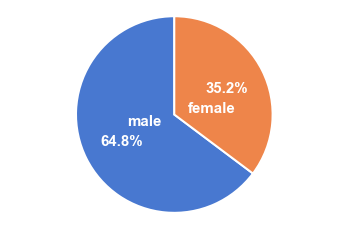

In [12]:
per_pie(data['Sex'])

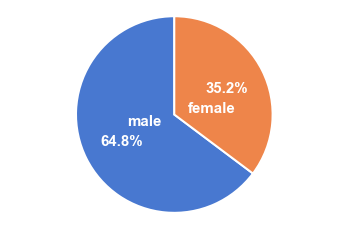

In [13]:
import graph as g
g.per_pie(data['Sex'])

In [14]:
# 質的データの可視化
def categorical_plot(survival, death, variable_name, label):
    '''質的なデータの説明変数と生存者数の関係の可視化
    
    Args:
            survival(DataFrame): 生存者のデータ
            death(DataFrame): 死亡者のデータ
            variable_name(object):可視化したい質的な説明変数の変数名
            label(np.ndarray):可視化したい説明変数を棒グラフにした際のX軸のラベル
    '''
    survival_counts = survival[variable_name].value_counts().sort_index() 
    survival_counts.plot.bar(color=maincolor, bottom=0)
    death[variable_name].value_counts().sort_index().plot.bar(color=accentcolor, bottom=survival_counts)
    plt.title(variable_name + ' and survivor')
    plt.xlabel(variable_name) 
    plt.ylabel('freq')
    labels = label
    x = np.arange(len(labels))
    plt.xticks(x, labels)
    plt.legend(['survival', 'death'])
    plt.show()

In [15]:
# 量的データの可視化
def continuous_plot(survival, death, variable_name, bins):
    '''質的なデータの説明変数と生存者数の関係の可視化
    
    Args:
            survival(DataFrame): 生存者のデータ
            death(DataFrame): 死亡者のデータ
            variable_name(object):可視化したい質的な説明変数の変数名
    '''
    plt.hist((survival[variable_name], death[variable_name]), stacked=True, color=(maincolor, accentcolor), bins=bins)
    plt.title(variable_name + ' and survivor')
    plt.xlabel(variable_name) 
    plt.ylabel('freq')
    plt.legend(['survival', 'death'])
    plt.show()

In [1]:
import graph as g
import pandas as pd

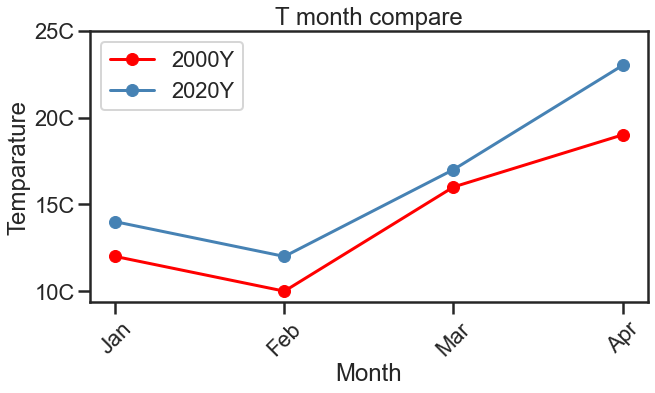

In [16]:
data = pd.DataFrame({"2000Y"  : [12,10,16,19],
                 "2020Y": [14,12,17,23]})

g.duplex(main_title="T month compare",
     x_title="Month",
     x_rotation=45,
     x_scale=[[0,1,2,3],["Jan","Feb","Mar","Apr"]],
     y_title="Temparature",
     y_scale=[[10,15,20,25],["10C","15C","20C","25C"]],
     y_rotation=90,
     g_type=["line","line"],
     g_data=[data['2000Y'],data['2020Y']],
     label=["2000Y","2020Y"],
     color=["Red","steelblue"])
